Notebook to compare the upper and lower bounds based on different time windows, ci and csi derivations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn import metrics
plt.rcParams["font.family"] = "Times New Roman"

import warnings
warnings.filterwarnings("ignore")

In [2]:
def ci_to_csi(x):
    
    csi_1 = [0.02 + 0.98*(1 - i) for i in x]
    
    csi_2 = [2.36*i**5 - 6.2*i**4 + 6.22*i**3 - 2.63*i**2 - 0.58*i + 1 for i in x]
    
    csi_3 = []
    for i in x:
        if i < -0.2:
            csi_3.append(1.2)
        if i >= -0.2 and i < 0.8:
            csi_3.append(1-i)
        if i >= 0.8 and i < 1.1:
            csi = 2.0667 - 3.6667*i + 1.6667*i*i
            csi_3.append(csi)
        if i >= 1.1:
            csi_3.append(0.05)
            
    csi_4 = []
    for i in list(x):
        if i < -0.2:
            csi_4.append(1.2)
        if i >= -0.2 and i < 0.8:
            csi_4.append(1-i)
        if i >= 0.8 and i < 1.05:
            csi = 1.1661 - 1.781*i + 0.73*i*i
            csi_4.append(csi)
        if i >= 1.05:
            csi_4.append(0.09)
            
    return csi_1,csi_2,csi_3,csi_4

In [3]:
# c01 fixed month

df_1m = pd.read_csv('c01_ci_month.csv')
df_1m['time'] = pd.to_datetime(df_1m['time'])
df_1m = df_1m.dropna()
df_1m = df_1m.set_index('time')
df_1m = df_1m.drop(columns=['time.1'])
csi = ci_to_csi(list(df_1m['ci'].values))
df_1m['csi_1'] = csi[0]
df_1m['csi_2'] = csi[1]
        
df_1m['csi_3'] = csi[2]
df_1m['csi_4'] = csi[3]
df_1m.head()

,ci,high,low,csi_1,csi_2,csi_3,csi_4
time,,,,,,,
2019-01-01 16:05:00,0.007861,543.537684,243.298115,0.992296,0.995281,0.992139,0.992139
2019-01-01 16:10:00,0.073763,543.537684,220.883821,0.927712,0.945225,0.926237,0.926237
2019-01-01 16:15:00,0.019996,543.537684,237.920832,0.980404,0.987399,0.980004,0.980004
2019-01-01 16:20:00,0.005287,543.537684,242.065771,0.994819,0.996861,0.994713,0.994713
2019-01-01 16:25:00,0.017061,543.537684,238.324334,0.983280,0.989369,0.982939,0.982939


In [4]:
# c02 fixed month

df_2m = pd.read_csv('c02_ci_month.csv')
df_2m['time'] = pd.to_datetime(df_2m['time'])
df_2m = df_2m.drop(columns=['time.1'])
df_2m = df_2m.dropna()
df_2m = df_2m.set_index('time')
csi = ci_to_csi(list(df_2m['ci'].values))
df_2m['csi_1'] = csi[0]
df_2m['csi_2'] = csi[1]
        
df_2m['csi_3'] = csi[2]
df_2m['csi_4'] = csi[3]
df_2m.head()

,ci,high,low,csi_1,csi_2,csi_3,csi_4
time,,,,,,,
2019-01-01 16:05:00,0.013135,415.861379,128.799757,0.987128,0.991942,0.986865,0.986865
2019-01-01 16:10:00,0.067965,415.861379,115.346744,0.933394,0.950256,0.932035,0.932035
2019-01-01 16:15:00,0.013846,415.861379,137.513389,0.986431,0.991482,0.986154,0.986154
2019-01-01 16:20:00,-0.009069,415.861379,145.143145,1.008887,1.005039,1.009069,1.009069
2019-01-01 16:25:00,0.013379,415.861379,141.295004,0.986888,0.991784,0.986621,0.986621


In [5]:
# c03 fixed month

df_3m = pd.read_csv('c03_ci_month.csv')
df_3m['time'] = pd.to_datetime(df_3m['time'])
df_3m = df_3m.drop(columns=['time.1'])
df_3m = df_3m.dropna()
df_3m = df_3m.set_index('time')
csi = ci_to_csi(list(df_3m['ci'].values))
df_3m['csi_1'] = csi[0]
df_3m['csi_2'] = csi[1]
        
df_3m['csi_3'] = csi[2]
df_3m['csi_4'] = csi[3]
df_3m.head()

,ci,high,low,csi_1,csi_2,csi_3,csi_4
time,,,,,,,
2019-01-01 16:05:00,0.070286,264.945409,91.070463,0.931120,0.948254,0.929714,0.929714
2019-01-01 16:10:00,0.172573,264.945409,74.283494,0.830878,0.848412,0.827427,0.827427
2019-01-01 16:15:00,0.069412,264.945409,96.714001,0.931976,0.949009,0.930588,0.930588
2019-01-01 16:20:00,0.038903,264.945409,104.515138,0.961875,0.973808,0.961097,0.961097
2019-01-01 16:25:00,0.095777,264.945409,98.172615,0.906139,0.925286,0.904223,0.904223


In [6]:
# c01, 30 days moving

df_130 = pd.read_csv('c01_ci_30.csv')
df_130['time'] = pd.to_datetime(df_130['time'])
df_130 = df_130.dropna()
df_130 = df_130.rename(columns={'ci_1':'ci'})
df_130 = df_130.set_index('time')
csi = ci_to_csi(list(df_130['ci'].values))
df_130['csi_1'] = csi[0]
df_130['csi_2'] = csi[1]
        
df_130['csi_3'] = csi[2]
df_130['csi_4'] = csi[3]
df_130.head()

,ci,high,low,csi_1,csi_2,csi_3,csi_4
time,,,,,,,
2019-01-31 16:05:00,0.182671,543.537684,243.298115,0.820983,0.837782,0.817329,0.817329
2019-01-31 16:10:00,0.338445,543.537684,220.883821,0.668324,0.672713,0.661555,0.661555
2019-01-31 16:15:00,0.338625,543.537684,237.920832,0.668147,0.672527,0.661375,0.661375
2019-01-31 16:20:00,0.212717,543.537684,242.065771,0.791537,0.805822,0.787283,0.787283
2019-01-31 16:25:00,0.337069,543.537684,238.324334,0.669672,0.674130,0.662931,0.662931


In [7]:
# c02, 30 days moving

df_230 = pd.read_csv('c02_ci_30.csv')
df_230['time'] = pd.to_datetime(df_230['time'])
df_230 = df_230.dropna()
df_230 = df_230.rename(columns={'ci_1':'ci'})
df_230 = df_230.set_index('time')
csi = ci_to_csi(list(df_230['ci'].values))
df_230['csi_1'] = csi[0]
df_230['csi_2'] = csi[1]
        
df_230['csi_3'] = csi[2]
df_230['csi_4'] = csi[3]

df_230.head()

,ci,high,low,csi_1,csi_2,csi_3,csi_4
time,,,,,,,
2019-01-31 16:05:00,0.222082,415.861379,128.799757,0.782360,0.795802,0.777918,0.777918
2019-01-31 16:10:00,0.327348,415.861379,115.346744,0.679199,0.684178,0.672652,0.672652
2019-01-31 16:15:00,0.288201,415.861379,137.513389,0.717563,0.725209,0.711799,0.711799
2019-01-31 16:20:00,0.112097,415.861379,145.143145,0.890145,0.909760,0.887903,0.887903
2019-01-31 16:25:00,0.307581,415.861379,141.295004,0.698571,0.704791,0.692419,0.692419


In [8]:
# c03, 30 days moving

df_330 = pd.read_csv('c03_ci_30.csv')
df_330['time'] = pd.to_datetime(df_330['time'])
df_330 = df_330.dropna()
df_330 = df_330.rename(columns={'ci_1':'ci'})
df_330 = df_330.set_index('time')
csi = ci_to_csi(list(df_330['ci'].values))
df_330['csi_1'] = csi[0]
df_330['csi_2'] = csi[1]
        
df_330['csi_3'] = csi[2]
df_330['csi_4'] = csi[3]

df_330.head()

,ci,high,low,csi_1,csi_2,csi_3,csi_4
time,,,,,,,
2019-01-31 16:05:00,0.172625,264.945409,91.070463,0.830827,0.848357,0.827375,0.827375
2019-01-31 16:10:00,0.344560,264.945409,74.283494,0.662331,0.666430,0.655440,0.655440
2019-01-31 16:15:00,0.304231,264.945409,96.714001,0.701854,0.708306,0.695769,0.695769
2019-01-31 16:20:00,0.082553,264.945409,104.515138,0.919098,0.937417,0.917447,0.917447
2019-01-31 16:25:00,0.290572,264.945409,98.172615,0.715239,0.722701,0.709428,0.709428


In [9]:
# c01, 60 days moving

df_160 = pd.read_csv('c01_ci_60.csv')
df_160['time'] = pd.to_datetime(df_160['time'])
df_160 = df_160.dropna()
df_160 = df_160.rename(columns={'ci_1':'ci'})
df_160 = df_160.set_index('time')
csi = ci_to_csi(list(df_160['ci'].values))
df_160['csi_1'] = csi[0]
df_160['csi_2'] = csi[1]
        
df_160['csi_3'] = csi[2]
df_160['csi_4'] = csi[3]

df_160.head()

,ci,high,low,csi_1,csi_2,csi_3,csi_4
time,,,,,,,
2019-03-02 16:05:00,0.812669,599.437743,244.783700,0.203584,0.262346,0.187626,0.200851
2019-03-02 16:10:00,0.800349,599.437743,241.686300,0.215658,0.270997,0.199679,0.208286
2019-03-02 16:15:00,0.730574,599.437743,243.251267,0.284038,0.322870,0.269426,0.269426
2019-03-02 16:20:00,0.625822,599.437743,242.745281,0.386694,0.407049,0.374178,0.374178
2019-03-02 16:25:00,0.668277,599.437743,239.085865,0.345088,0.372193,0.331723,0.331723


In [10]:
# c02, 60 days moving

df_260 = pd.read_csv('c02_ci_60.csv')
df_260['time'] = pd.to_datetime(df_260['time'])
df_260 = df_260.dropna()
df_260 = df_260.rename(columns={'ci_1':'ci'})
df_260 = df_260.set_index('time')
csi = ci_to_csi(list(df_260['ci'].values))
df_260['csi_1'] = csi[0]
df_260['csi_2'] = csi[1]
        
df_260['csi_3'] = csi[2]
df_260['csi_4'] = csi[3]

df_260.head()

,ci,high,low,csi_1,csi_2,csi_3,csi_4
time,,,,,,,
2019-03-02 16:05:00,0.772927,491.309949,145.520757,0.242531,0.290857,0.227073,0.227073
2019-03-02 16:10:00,0.638585,491.309949,146.686429,0.374187,0.396471,0.361415,0.361415
2019-03-02 16:15:00,0.634215,491.309949,151.486074,0.378469,0.400083,0.365785,0.365785
2019-03-02 16:20:00,0.527678,491.309949,154.945479,0.482876,0.491395,0.472322,0.472322
2019-03-02 16:25:00,0.567743,491.309949,153.836965,0.443612,0.456289,0.432257,0.432257


In [11]:
# c03, 60 days moving

df_360 = pd.read_csv('c03_ci_60.csv')
df_360['time'] = pd.to_datetime(df_360['time'])
df_360 = df_360.dropna()
df_360 = df_360.rename(columns={'ci_1':'ci'})
df_360 = df_360.set_index('time')
csi = ci_to_csi(list(df_360['ci'].values))
df_360['csi_1'] = csi[0]
df_360['csi_2'] = csi[1]
        
df_360['csi_3'] = csi[2]
df_360['csi_4'] = csi[3]

df_360.head()

,ci,high,low,csi_1,csi_2,csi_3,csi_4
time,,,,,,,
2019-03-02 16:05:00,0.707237,308.105548,103.499321,0.306908,0.341070,0.292763,0.292763
2019-03-02 16:10:00,0.635245,308.105548,104.428078,0.377459,0.399230,0.364755,0.364755
2019-03-02 16:15:00,0.563765,308.105548,107.126373,0.447511,0.459731,0.436235,0.436235
2019-03-02 16:20:00,0.475064,308.105548,110.107408,0.534437,0.539101,0.524936,0.524936
2019-03-02 16:25:00,0.521099,308.105548,109.882237,0.489323,0.497256,0.478901,0.478901


In [12]:
df_190 = pd.read_csv('c01_ci_90.csv')
df_190['time'] = pd.to_datetime(df_190['time'])
df_190 = df_190.dropna()
df_190 = df_190.rename(columns={'ci_1':'ci'})
df_190 = df_190.set_index('time')
csi = ci_to_csi(list(df_190['ci'].values))
df_190['csi_1'] = csi[0]
df_190['csi_2'] = csi[1]
        
df_190['csi_3'] = csi[2]
df_190['csi_4'] = csi[3]

df_190.head()

,ci,high,low,csi_1,csi_2,csi_3,csi_4
time,,,,,,,
2019-04-01 16:05:00,0.041411,613.575288,224.717128,0.959417,0.971895,0.958589,0.958589
2019-04-01 16:10:00,0.112999,613.575288,222.688610,0.889261,0.908886,0.887001,0.887001
2019-04-01 16:15:00,0.124757,613.575288,223.817649,0.877739,0.897354,0.875243,0.875243
2019-04-01 16:20:00,0.160004,613.575288,225.960222,0.843196,0.861530,0.839996,0.839996
2019-04-01 16:25:00,0.118449,613.575288,223.363153,0.883920,0.903571,0.881551,0.881551


In [13]:
df_290 = pd.read_csv('c02_ci_90.csv')
df_290['time'] = pd.to_datetime(df_290['time'])
df_290 = df_290.dropna()
df_290 = df_290.rename(columns={'ci_1':'ci'})
df_290 = df_290.set_index('time')
csi = ci_to_csi(list(df_290['ci'].values))
df_290['csi_1'] = csi[0]
df_290['csi_2'] = csi[1]
        
df_290['csi_3'] = csi[2]
df_290['csi_4'] = csi[3]

df_290.head()

,ci,high,low,csi_1,csi_2,csi_3,csi_4
time,,,,,,,
2019-04-01 16:05:00,0.048405,500.682207,139.967245,0.952563,0.966435,0.951595,0.951595
2019-04-01 16:10:00,0.115035,500.682207,141.269600,0.887265,0.906907,0.884965,0.884965
2019-04-01 16:15:00,0.131605,500.682207,145.332824,0.871028,0.890529,0.868395,0.868395
2019-04-01 16:20:00,0.157543,500.682207,150.211860,0.845608,0.864080,0.842457,0.842457
2019-04-01 16:25:00,0.117797,500.682207,148.808218,0.884559,0.904211,0.882203,0.882203


In [14]:
df_390 = pd.read_csv('c03_ci_90.csv')
df_390['time'] = pd.to_datetime(df_390['time'])
df_390 = df_390.dropna()
df_390 = df_390.rename(columns={'ci_1':'ci'})
df_390 = df_390.set_index('time')
csi = ci_to_csi(list(df_390['ci'].values))
df_390['csi_1'] = csi[0]
df_390['csi_2'] = csi[1]
        
df_390['csi_3'] = csi[2]
df_390['csi_4'] = csi[3]

df_390.head()

,ci,high,low,csi_1,csi_2,csi_3,csi_4
time,,,,,,,
2019-04-01 16:05:00,0.015332,320.770086,100.864782,0.984974,0.990511,0.984668,0.984668
2019-04-01 16:10:00,0.073222,320.770086,102.343304,0.928242,0.945699,0.926778,0.926778
2019-04-01 16:15:00,0.083275,320.770086,104.871883,0.918391,0.936766,0.916725,0.916725
2019-04-01 16:20:00,0.103878,320.770086,108.042537,0.898200,0.917650,0.896122,0.896122
2019-04-01 16:25:00,0.068366,320.770086,107.065526,0.933001,0.949911,0.931634,0.931634


In [15]:
# find the common index
index_c = [index for index in df_1m.index if index in df_2m.index and index in df_3m.index and index in df_130.index \
           and index in df_230.index and index in df_330.index and index in df_160.index and index in df_260.index \
           and index in df_360.index and index in df_190.index and index in df_290.index and index in df_390.index]
len(index_c)

4086

In [16]:
# read the ghi values of clear-sky models and measurements
df_g = pd.read_csv('dra_ghics_ghi_2019.csv')
df_g['time'] = pd.to_datetime(df_g['Unnamed: 0'])
df_g = df_g.set_index(df_g['time'])
df_g = df_g.drop(columns=['time','Unnamed: 0'])
df_g.head()

,ghics_pvlib,ghics_tl,ghics_mc,zen,ghi,ghi_ns,ghics_rest
time,,,,,,,
2019-01-01 12:05:00,0.0,0.0,0.0,123.650,NaN,0,0
2019-01-01 12:10:00,0.0,0.0,0.0,122.650,NaN,0,0
2019-01-01 12:15:00,0.0,0.0,0.0,121.650,NaN,0,0
2019-01-01 12:20:00,0.0,0.0,0.0,120.660,NaN,0,0
2019-01-01 12:25:00,0.0,0.0,0.0,119.662,NaN,0,0


In [17]:
# determine the reference csi using the REST2 clear-sky model
df_g = df_g[df_g['ghi']>0]
df_g = df_g.dropna()
df_g['csi'] = df_g['ghi']/df_g['ghics_rest']
df_g.head()

,ghics_pvlib,ghics_tl,ghics_mc,zen,ghi,ghi_ns,ghics_rest,csi
time,,,,,,,,
2019-01-01 16:05:00,140.300612,156.313124,184.7688,79.396,154.18,174,174,0.886092
2019-01-01 16:10:00,155.411056,171.977689,200.6832,78.628,168.46,189,189,0.891323
2019-01-01 16:15:00,170.499527,187.561776,216.4620,77.870,182.98,44,203,0.901379
2019-01-01 16:20:00,185.519533,203.026862,232.0884,77.124,197.40,218,218,0.905505
2019-01-01 16:25:00,200.432172,218.340727,247.5360,76.386,211.72,52,233,0.908670


In [18]:
# upper bound of different strategies
df_high = pd.DataFrame()
df_high['time'] = index_c
df_high['b1s1'] = df_190.loc[index_c,'high'].values
df_high['b1s2'] = df_160.loc[index_c,'high'].values
df_high['b1s3'] = df_130.loc[index_c,'high'].values
df_high['b1s4'] = df_1m.loc[index_c,'high'].values
df_high['b2s1'] = df_290.loc[index_c,'high'].values
df_high['b2s2'] = df_260.loc[index_c,'high'].values
df_high['b2s3'] = df_230.loc[index_c,'high'].values
df_high['b2s4'] = df_2m.loc[index_c,'high'].values
df_high['b3s1'] = df_390.loc[index_c,'high'].values
df_high['b3s2'] = df_360.loc[index_c,'high'].values
df_high['b3s3'] = df_330.loc[index_c,'high'].values
df_high['b3s4'] = df_3m.loc[index_c,'high'].values
df_high = df_high.set_index('time')
df_high.head()

,b1s1,b1s2,b1s3,b1s4,b2s1,b2s2,b2s3,b2s4,b3s1,b3s2,b3s3,b3s4
time,,,,,,,,,,,,
2019-04-01 16:05:00,613.575288,613.181835,594.079597,729.256745,500.682207,500.682207,467.586732,632.924961,320.770086,319.921884,308.948435,420.389923
2019-04-01 16:10:00,613.575288,613.181835,594.079597,729.256745,500.682207,500.682207,467.586732,632.924961,320.770086,319.921884,308.948435,420.389923
2019-04-01 16:15:00,613.575288,613.181835,594.079597,729.256745,500.682207,500.682207,467.586732,632.924961,320.770086,319.921884,308.948435,420.389923
2019-04-01 16:20:00,613.575288,613.181835,594.079597,729.256745,500.682207,500.682207,467.586732,632.924961,320.770086,319.921884,308.948435,420.389923
2019-04-01 16:25:00,613.575288,613.181835,594.079597,729.256745,500.682207,500.682207,467.586732,632.924961,320.770086,319.921884,308.948435,420.389923


In [19]:
df_high.describe()

,b1s1,b1s2,b1s3,b1s4,b2s1,b2s2,b2s3,b2s4,b3s1,b3s2,b3s3,b3s4
count,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000
mean,667.074047,654.063548,684.567390,710.091184,560.750909,546.923745,579.501748,586.882991,367.005662,359.797443,384.899383,406.446584
std,29.230759,38.633897,53.728888,23.978826,33.007271,41.069768,61.358018,57.605016,24.301687,29.115243,40.976521,17.445089
min,613.575288,582.220621,582.970180,680.097624,500.682207,462.583646,461.362201,514.828609,320.770086,298.931645,306.191047,384.625653
25%,621.765054,618.525541,609.589012,680.097624,514.708744,503.156143,505.958641,514.828609,335.552518,322.171925,337.905837,384.625653
50%,685.541335,674.779902,706.918144,729.256745,578.959477,574.253202,588.164620,632.924961,380.876809,377.691588,397.241203,420.389923
75%,688.125040,674.900857,729.256745,729.256745,589.062385,574.419686,632.924961,632.924961,385.109778,378.154031,420.389923,420.389923
max,701.529683,701.529683,734.012790,729.256745,590.134198,590.134198,632.924961,632.924961,396.261701,396.261701,420.389923,420.389923


In [20]:
# lower bound of different strategies
df_low = pd.DataFrame()
df_low['time'] = index_c
df_low['b1s1'] = df_190.loc[index_c,'low'].values
df_low['b1s2'] = df_160.loc[index_c,'low'].values
df_low['b1s3'] = df_130.loc[index_c,'low'].values
df_low['b1s4'] = df_1m.loc[index_c,'low'].values
df_low['b2s1'] = df_290.loc[index_c,'low'].values
df_low['b2s2'] = df_260.loc[index_c,'low'].values
df_low['b2s3'] = df_230.loc[index_c,'low'].values
df_low['b2s4'] = df_2m.loc[index_c,'low'].values
df_low['b3s1'] = df_390.loc[index_c,'low'].values
df_low['b3s2'] = df_360.loc[index_c,'low'].values
df_low['b3s3'] = df_330.loc[index_c,'low'].values
df_low['b3s4'] = df_3m.loc[index_c,'low'].values
df_low = df_low.set_index('time')
df_low.describe()

,b1s1,b1s2,b1s3,b1s4,b2s1,b2s2,b2s3,b2s4,b3s1,b3s2,b3s3,b3s4
count,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000
mean,143.057684,145.547781,126.000957,119.720173,102.232760,104.850483,91.479446,85.662134,77.372545,79.853701,74.241636,71.382196
std,34.126813,33.157865,29.404817,25.072871,27.055993,27.058356,24.502558,20.243500,20.077883,19.973575,18.355341,16.558704
min,100.867973,102.606780,92.366961,92.856923,65.412728,67.900426,53.202812,53.202812,49.768027,53.043312,36.481309,36.481309
25%,115.373405,119.466404,102.150705,97.849708,77.068131,80.125576,69.960994,67.132997,59.524636,62.059286,58.099887,57.054571
50%,130.494635,134.066071,115.763670,110.959614,96.504172,98.078473,85.081329,80.970585,73.360195,74.362821,69.477713,66.565102
75%,169.875004,170.152870,148.422948,139.414412,126.454217,127.590667,111.199763,104.276976,96.957420,97.678390,90.185949,85.044686
max,225.980256,229.694236,206.585269,177.708008,159.654703,170.928148,154.554576,123.964904,115.184075,125.195984,118.513459,104.564022


In [21]:
# derived ci
df_ci = pd.DataFrame()
df_ci['time'] = index_c
df_ci['b1s1'] = df_190.loc[index_c,'ci'].values
df_ci['b1s2'] = df_160.loc[index_c,'ci'].values
df_ci['b1s3'] = df_130.loc[index_c,'ci'].values
df_ci['b1s4'] = df_1m.loc[index_c,'ci'].values
df_ci['b2s1'] = df_290.loc[index_c,'ci'].values
df_ci['b2s2'] = df_260.loc[index_c,'ci'].values
df_ci['b2s3'] = df_230.loc[index_c,'ci'].values
df_ci['b2s4'] = df_2m.loc[index_c,'ci'].values
df_ci['b3s1'] = df_390.loc[index_c,'ci'].values
df_ci['b3s2'] = df_360.loc[index_c,'ci'].values
df_ci['b3s3'] = df_330.loc[index_c,'ci'].values
df_ci['b3s4'] = df_3m.loc[index_c,'ci'].values
df_ci = df_ci.set_index('time')
df_ci.describe()

,b1s1,b1s2,b1s3,b1s4,b2s1,b2s2,b2s3,b2s4,b3s1,b3s2,b3s3,b3s4
count,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000
mean,0.087953,0.085546,0.114238,0.119159,0.074358,0.070980,0.092767,0.102426,0.080180,0.073983,0.085697,0.088682
std,0.202335,0.207637,0.186636,0.180953,0.174076,0.180176,0.161441,0.162098,0.159921,0.164561,0.146981,0.140210
min,-0.127323,-0.141344,-0.075789,-0.033518,-0.178573,-0.201511,-0.162598,-0.100621,-0.190997,-0.212249,-0.178862,-0.111911
25%,-0.035381,-0.041011,-0.002550,0.005656,-0.030525,-0.036104,-0.002565,0.003110,-0.015132,-0.021412,-0.000842,0.006534
50%,-0.011795,-0.016448,0.015478,0.025531,-0.009401,-0.015527,0.006981,0.022079,0.008208,-0.001480,0.012378,0.023013
75%,0.139470,0.138876,0.168377,0.164831,0.115903,0.113666,0.132726,0.138064,0.110478,0.106237,0.115269,0.107422
max,1.149593,1.151130,1.205063,0.908276,1.016346,1.016718,1.122903,0.791611,1.040651,1.046349,1.099711,0.755725


In [22]:
# difference between the upper and lower bounds
df_u_l = pd.DataFrame()
df_u_l['time'] = index_c
df_u_l['b1s1'] = df_high['b1s1'].values - df_low['b1s1'].values
df_u_l['b1s2'] = df_high['b1s2'].values - df_low['b1s2'].values
df_u_l['b1s3'] = df_high['b1s3'].values - df_low['b1s3'].values
df_u_l['b1s4'] = df_high['b1s4'].values - df_low['b1s4'].values
df_u_l['b2s1'] = df_high['b2s1'].values - df_low['b2s1'].values
df_u_l['b2s2'] = df_high['b2s2'].values - df_low['b2s2'].values
df_u_l['b2s3'] = df_high['b2s3'].values - df_low['b2s3'].values
df_u_l['b2s4'] = df_high['b2s4'].values - df_low['b2s4'].values
df_u_l['b3s1'] = df_high['b3s1'].values - df_low['b3s1'].values
df_u_l['b3s2'] = df_high['b3s2'].values - df_low['b3s2'].values
df_u_l['b3s3'] = df_high['b3s3'].values - df_low['b3s3'].values
df_u_l['b3s4'] = df_high['b3s4'].values - df_low['b3s4'].values
df_u_l.describe()

,b1s1,b1s2,b1s3,b1s4,b2s1,b2s2,b2s3,b2s4,b3s1,b3s2,b3s3,b3s4
count,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000
mean,524.016363,508.515766,558.566433,590.371012,458.518149,442.073262,488.022302,501.220857,289.633117,279.943742,310.657747,335.064389
std,49.239579,56.466530,66.089543,34.133290,46.508743,53.888260,71.489080,59.882208,33.067443,37.191856,46.858650,22.194525
min,387.595032,353.726883,376.384911,514.152362,341.074528,295.834955,308.401817,401.498197,205.921811,176.430949,190.434976,290.952667
25%,494.268776,466.611290,505.108585,565.137381,428.124986,401.167344,434.940424,444.640296,269.381003,253.104109,275.822352,319.122079
50%,533.195549,523.807123,575.246291,585.438922,464.556136,452.614498,511.236223,519.516692,293.776683,288.004614,323.317521,331.658433
75%,566.033132,555.980256,613.255081,625.736366,498.790077,488.703135,549.310581,557.302692,317.587899,311.126221,350.440625,355.993860
max,600.661711,598.922904,641.645829,636.399822,524.721470,519.698984,579.722149,579.722149,345.978993,340.335144,383.908615,383.908615


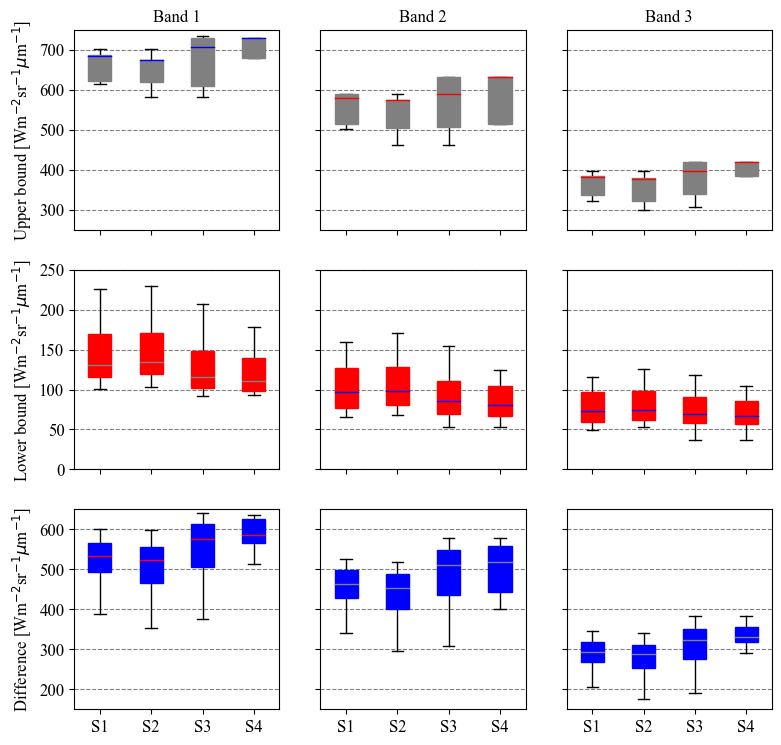

In [23]:
# box plot of the upper bound, lower bound, and the difference

strategy = ['S1','S2','S3','S4']
fig = plt.figure(figsize=(9,9),dpi=100)

plt.subplot(331)
plt.boxplot([df_high['b1s1'],df_high['b1s2'],df_high['b1s3'],df_high['b1s4']],
            patch_artist = True,
            medianprops=dict(color='b'),
            boxprops = dict(color='gray',facecolor='gray'),
           )

plt.xticks(range(1,5),[' ']*4,color = 'w',fontsize=10,rotation=0)
plt.yticks(fontsize=12)
plt.ylim(250,750)
plt.ylabel('Upper bound [Wm$^{-2}$sr$^{-1}\mu$m$^{-1}$]', fontsize = 12)
plt.grid(axis='y',ls='--',color='grey')
plt.title('Band 1')


plt.subplot(332)
plt.boxplot([df_high['b2s1'],df_high['b2s2'],df_high['b2s3'],df_high['b2s4']],
            patch_artist = True,
            medianprops=dict(color='red'),
            boxprops = dict(color='gray',facecolor='gray'),
           )
plt.xticks(range(1,5),[' ']*4,color = 'w',fontsize=10,rotation=0)
plt.yticks(fontsize=10,color='w')
plt.ylim(250,750)
plt.grid(axis='y',ls='--',color='grey')
plt.title('Band 2')

plt.subplot(333)
plt.boxplot([df_high['b3s1'],df_high['b3s2'],df_high['b3s3'],df_high['b3s4']],
            patch_artist = True,
            boxprops = dict(color='gray',facecolor='gray'),
            medianprops=dict(color='red'),
           )
plt.yticks(fontsize=10,color='w')
plt.xticks(range(1,5),[' ']*4,color = 'w',fontsize=10,rotation=0)
plt.ylim(250,750)
plt.grid(axis='y',ls='--',color='grey')
plt.title('Band 3')

plt.subplot(334)
plt.boxplot([df_low['b1s1'],df_low['b1s2'],df_low['b1s3'],df_low['b1s4']],
            patch_artist = True,
            boxprops = dict(color='r',facecolor='r'),
            medianprops=dict(color='gray'),
           )

plt.xticks(range(1,5),[' ']*4,color = 'w',fontsize=10,rotation=0)
plt.yticks(fontsize=12)
plt.ylabel('Lower bound [Wm$^{-2}$sr$^{-1}\mu$m$^{-1}$]', fontsize = 12)
plt.ylim(0,250)
plt.grid(axis='y',ls='--',color='grey')

plt.subplot(335)
plt.boxplot([df_low['b2s1'],df_low['b2s2'],df_low['b2s3'],df_low['b2s4']],
            patch_artist = True,
            boxprops = dict(color='r',facecolor='r'),
            medianprops=dict(color='b'),
           )
plt.xticks(range(1,5),[' ']*4,color = 'w',fontsize=10,rotation=0)
plt.yticks(fontsize=10,color='w')
plt.ylim(0,250)
plt.grid(axis='y',ls='--',color='grey')

plt.subplot(336)
plt.boxplot([df_low['b3s1'],df_low['b3s2'],df_low['b3s3'],df_low['b3s4']],
            patch_artist = True,
            boxprops = dict(color='r',facecolor='r'),
            medianprops=dict(color='b'),
           )
plt.xticks(range(1,5),[' ']*4,color = 'w',fontsize=10,rotation=0)
plt.yticks(fontsize=10,color='w')
plt.ylim(0,250)
plt.grid(axis='y',ls='--',color='grey')


plt.subplot(337)
plt.boxplot([df_u_l['b1s1'],df_u_l['b1s2'],df_u_l['b1s3'],df_u_l['b1s4']],
            patch_artist = True,
            medianprops=dict(color='r'),
            boxprops = dict(color='b',facecolor='b'),
           )

plt.yticks(fontsize=12)
plt.ylim(150,650)
plt.ylabel('Difference [Wm$^{-2}$sr$^{-1}\mu$m$^{-1}$]', fontsize = 12)
plt.grid(axis='y',ls='--',color='grey')
plt.xticks(range(1,5),strategy,fontsize=12,rotation=0)

plt.subplot(338)
plt.boxplot([df_u_l['b2s1'],df_u_l['b2s2'],df_u_l['b2s3'],df_u_l['b2s4']],
            patch_artist = True,
            medianprops=dict(color='gray'),
            boxprops = dict(color='b',facecolor='b'),
           )
plt.yticks(fontsize=10,color='w')
plt.ylim(150,650)
plt.grid(axis='y',ls='--',color='grey')
plt.xticks(range(1,5),strategy,fontsize=12,rotation=0)

plt.subplot(339)
plt.boxplot([df_u_l['b3s1'],df_u_l['b3s2'],df_u_l['b3s3'],df_u_l['b3s4']],
            patch_artist = True,
            boxprops = dict(color='b',facecolor='b'),
            medianprops=dict(color='gray'),
           )
plt.yticks(fontsize=10,color='w')
plt.ylim(150,650)
plt.grid(axis='y',ls='--',color='grey')
plt.xticks(range(1,5),strategy,fontsize=12,rotation=0)

#plt.savefig('fig_up_low_d.pdf',bbox_inches='tight')
plt.show()

In [24]:
# find the common index with the refercence csi
index_cc = [index for index in index_c if index in df_g.index]
len(index_cc)

3971

In [60]:
# collect the error values
c1_m1_r,c1_m2_r,c1_m3_r,c1_m4_r = [],[],[],[] #rRMSE

c1_m1_m,c1_m2_m,c1_m3_m,c1_m4_m = [],[],[],[] #rMBE

c2_m1_r,c2_m2_r,c2_m3_r,c2_m4_r = [],[],[],[] 

c2_m1_m,c2_m2_m,c2_m3_m,c2_m4_m = [],[],[],[] 

c3_m1_r,c3_m2_r,c3_m3_r,c3_m4_r = [],[],[],[] 

c3_m1_m,c3_m2_m,c3_m3_m,c3_m4_m = [],[],[],[] 


In [61]:
#band1 M1 rmse
rmse1 = np.sqrt(metrics.mean_squared_error(df_190.loc[index_cc,'csi_1'],df_g.loc[index_cc,'csi']))
rmse2 = np.sqrt(metrics.mean_squared_error(df_160.loc[index_cc,'csi_1'],df_g.loc[index_cc,'csi']))
rmse3 = np.sqrt(metrics.mean_squared_error(df_130.loc[index_cc,'csi_1'],df_g.loc[index_cc,'csi']))
rmse4 = np.sqrt(metrics.mean_squared_error(df_1m.loc[index_cc,'csi_1'],df_g.loc[index_cc,'csi']))
mean = np.mean(df_g.loc[index_cc,'csi'])/100
c1_m1_r.append(rmse1/mean)
c1_m1_r.append(rmse2/mean)
c1_m1_r.append(rmse3/mean)
c1_m1_r.append(rmse4/mean)

In [62]:
#band1 M1 mbe
mbe1 = np.mean(df_190.loc[index_cc,'csi_1'] - df_g.loc[index_cc,'csi'])
mbe2 = np.mean(df_160.loc[index_cc,'csi_1'] - df_g.loc[index_cc,'csi'])
mbe3 = np.mean(df_130.loc[index_cc,'csi_1'] - df_g.loc[index_cc,'csi'])
mbe4 = np.mean(df_1m.loc[index_cc,'csi_1'] - df_g.loc[index_cc,'csi'])
c1_m1_m.append(mbe1/mean)
c1_m1_m.append(mbe2/mean)
c1_m1_m.append(mbe3/mean)
c1_m1_m.append(mbe4/mean)

In [63]:
#band1 M2 rmse
rmse1 = np.sqrt(metrics.mean_squared_error(df_190.loc[index_cc,'csi_2'],df_g.loc[index_cc,'csi']))
rmse2 = np.sqrt(metrics.mean_squared_error(df_160.loc[index_cc,'csi_2'],df_g.loc[index_cc,'csi']))
rmse3 = np.sqrt(metrics.mean_squared_error(df_130.loc[index_cc,'csi_2'],df_g.loc[index_cc,'csi']))
rmse4 = np.sqrt(metrics.mean_squared_error(df_1m.loc[index_cc,'csi_2'],df_g.loc[index_cc,'csi']))
mean = np.mean(df_g.loc[index_cc,'csi'])/100
c1_m2_r.append(rmse1/mean)
c1_m2_r.append(rmse2/mean)
c1_m2_r.append(rmse3/mean)
c1_m2_r.append(rmse4/mean)

In [64]:
#band1 M2 mbe
mbe1 = np.mean(df_190.loc[index_cc,'csi_2'] - df_g.loc[index_cc,'csi'])
mbe2 = np.mean(df_160.loc[index_cc,'csi_2'] - df_g.loc[index_cc,'csi'])
mbe3 = np.mean(df_130.loc[index_cc,'csi_2'] - df_g.loc[index_cc,'csi'])
mbe4 = np.mean(df_1m.loc[index_cc,'csi_2'] - df_g.loc[index_cc,'csi'])
c1_m2_m.append(mbe1/mean)
c1_m2_m.append(mbe2/mean)
c1_m2_m.append(mbe3/mean)
c1_m2_m.append(mbe4/mean)

In [65]:
#band1 M3 rmse
rmse1 = np.sqrt(metrics.mean_squared_error(df_190.loc[index_cc,'csi_3'],df_g.loc[index_cc,'csi']))
rmse2 = np.sqrt(metrics.mean_squared_error(df_160.loc[index_cc,'csi_3'],df_g.loc[index_cc,'csi']))
rmse3 = np.sqrt(metrics.mean_squared_error(df_130.loc[index_cc,'csi_3'],df_g.loc[index_cc,'csi']))
rmse4 = np.sqrt(metrics.mean_squared_error(df_1m.loc[index_cc,'csi_3'],df_g.loc[index_cc,'csi']))
mean = np.mean(df_g.loc[index_cc,'csi'])/100
c1_m3_r.append(rmse1/mean)
c1_m3_r.append(rmse2/mean)
c1_m3_r.append(rmse3/mean)
c1_m3_r.append(rmse4/mean)

In [66]:
#band1 M3 mbe
mbe1 = np.mean(df_190.loc[index_cc,'csi_3'] - df_g.loc[index_cc,'csi'])
mbe2 = np.mean(df_160.loc[index_cc,'csi_3'] - df_g.loc[index_cc,'csi'])
mbe3 = np.mean(df_130.loc[index_cc,'csi_3'] - df_g.loc[index_cc,'csi'])
mbe4 = np.mean(df_1m.loc[index_cc,'csi_3'] - df_g.loc[index_cc,'csi'])
c1_m3_m.append(mbe1/mean)
c1_m3_m.append(mbe2/mean)
c1_m3_m.append(mbe3/mean)
c1_m3_m.append(mbe4/mean)

In [67]:
#band1 M4 rmse
rmse1 = np.sqrt(metrics.mean_squared_error(df_190.loc[index_cc,'csi_4'],df_g.loc[index_cc,'csi']))
rmse2 = np.sqrt(metrics.mean_squared_error(df_160.loc[index_cc,'csi_4'],df_g.loc[index_cc,'csi']))
rmse3 = np.sqrt(metrics.mean_squared_error(df_130.loc[index_cc,'csi_4'],df_g.loc[index_cc,'csi']))
rmse4 = np.sqrt(metrics.mean_squared_error(df_1m.loc[index_cc,'csi_4'],df_g.loc[index_cc,'csi']))
mean = np.mean(df_g.loc[index_cc,'csi'])/100
c1_m4_r.append(rmse1/mean)
c1_m4_r.append(rmse2/mean)
c1_m4_r.append(rmse3/mean)
c1_m4_r.append(rmse4/mean)

In [68]:
#band1 M4 mbe
mbe1 = np.mean(df_190.loc[index_cc,'csi_4'] - df_g.loc[index_cc,'csi'])
mbe2 = np.mean(df_160.loc[index_cc,'csi_4'] - df_g.loc[index_cc,'csi'])
mbe3 = np.mean(df_130.loc[index_cc,'csi_4'] - df_g.loc[index_cc,'csi'])
mbe4 = np.mean(df_1m.loc[index_cc,'csi_4'] - df_g.loc[index_cc,'csi'])
c1_m4_m.append(mbe1/mean)
c1_m4_m.append(mbe2/mean)
c1_m4_m.append(mbe3/mean)
c1_m4_m.append(mbe4/mean)

In [69]:
#band2 M1 rmse
rmse1 = np.sqrt(metrics.mean_squared_error(df_290.loc[index_cc,'csi_1'],df_g.loc[index_cc,'csi']))
rmse2 = np.sqrt(metrics.mean_squared_error(df_260.loc[index_cc,'csi_1'],df_g.loc[index_cc,'csi']))
rmse3 = np.sqrt(metrics.mean_squared_error(df_230.loc[index_cc,'csi_1'],df_g.loc[index_cc,'csi']))
rmse4 = np.sqrt(metrics.mean_squared_error(df_2m.loc[index_cc,'csi_1'],df_g.loc[index_cc,'csi']))
mean = np.mean(df_g.loc[index_cc,'csi'])/100
c2_m1_r.append(rmse1/mean)
c2_m1_r.append(rmse2/mean)
c2_m1_r.append(rmse3/mean)
c2_m1_r.append(rmse4/mean)

In [70]:
#band2 M1 mbe
mbe1 = np.mean(df_290.loc[index_cc,'csi_1'] - df_g.loc[index_cc,'csi'])
mbe2 = np.mean(df_260.loc[index_cc,'csi_1'] - df_g.loc[index_cc,'csi'])
mbe3 = np.mean(df_230.loc[index_cc,'csi_1'] - df_g.loc[index_cc,'csi'])
mbe4 = np.mean(df_2m.loc[index_cc,'csi_1'] - df_g.loc[index_cc,'csi'])
c2_m1_m.append(mbe1/mean)
c2_m1_m.append(mbe2/mean)
c2_m1_m.append(mbe3/mean)
c2_m1_m.append(mbe4/mean)

In [71]:
#band2 M2 rmse
rmse1 = np.sqrt(metrics.mean_squared_error(df_290.loc[index_cc,'csi_2'],df_g.loc[index_cc,'csi']))
rmse2 = np.sqrt(metrics.mean_squared_error(df_260.loc[index_cc,'csi_2'],df_g.loc[index_cc,'csi']))
rmse3 = np.sqrt(metrics.mean_squared_error(df_230.loc[index_cc,'csi_2'],df_g.loc[index_cc,'csi']))
rmse4 = np.sqrt(metrics.mean_squared_error(df_2m.loc[index_cc,'csi_2'],df_g.loc[index_cc,'csi']))
mean = np.mean(df_g.loc[index_cc,'csi'])/100
c2_m2_r.append(rmse1/mean)
c2_m2_r.append(rmse2/mean)
c2_m2_r.append(rmse3/mean)
c2_m2_r.append(rmse4/mean)

In [72]:
#band2 M2 mbe
mbe1 = np.mean(df_290.loc[index_cc,'csi_2'] - df_g.loc[index_cc,'csi'])
mbe2 = np.mean(df_260.loc[index_cc,'csi_2'] - df_g.loc[index_cc,'csi'])
mbe3 = np.mean(df_230.loc[index_cc,'csi_2'] - df_g.loc[index_cc,'csi'])
mbe4 = np.mean(df_2m.loc[index_cc,'csi_2'] - df_g.loc[index_cc,'csi'])
c2_m2_m.append(mbe1/mean)
c2_m2_m.append(mbe2/mean)
c2_m2_m.append(mbe3/mean)
c2_m2_m.append(mbe4/mean)

In [73]:
#band2 M3 rmse
rmse1 = np.sqrt(metrics.mean_squared_error(df_290.loc[index_cc,'csi_3'],df_g.loc[index_cc,'csi']))
rmse2 = np.sqrt(metrics.mean_squared_error(df_260.loc[index_cc,'csi_3'],df_g.loc[index_cc,'csi']))
rmse3 = np.sqrt(metrics.mean_squared_error(df_230.loc[index_cc,'csi_3'],df_g.loc[index_cc,'csi']))
rmse4 = np.sqrt(metrics.mean_squared_error(df_2m.loc[index_cc,'csi_3'],df_g.loc[index_cc,'csi']))
mean = np.mean(df_g.loc[index_cc,'csi'])/100
c2_m3_r.append(rmse1/mean)
c2_m3_r.append(rmse2/mean)
c2_m3_r.append(rmse3/mean)
c2_m3_r.append(rmse4/mean)

In [74]:
#band2 M3 mbe
mbe1 = np.mean(df_290.loc[index_cc,'csi_3'] - df_g.loc[index_cc,'csi'])
mbe2 = np.mean(df_260.loc[index_cc,'csi_3'] - df_g.loc[index_cc,'csi'])
mbe3 = np.mean(df_230.loc[index_cc,'csi_3'] - df_g.loc[index_cc,'csi'])
mbe4 = np.mean(df_2m.loc[index_cc,'csi_3'] - df_g.loc[index_cc,'csi'])
c2_m3_m.append(mbe1/mean)
c2_m3_m.append(mbe2/mean)
c2_m3_m.append(mbe3/mean)
c2_m3_m.append(mbe4/mean)

In [75]:
#band2 M4 rmse
rmse1 = np.sqrt(metrics.mean_squared_error(df_290.loc[index_cc,'csi_4'],df_g.loc[index_cc,'csi']))
rmse2 = np.sqrt(metrics.mean_squared_error(df_260.loc[index_cc,'csi_4'],df_g.loc[index_cc,'csi']))
rmse3 = np.sqrt(metrics.mean_squared_error(df_230.loc[index_cc,'csi_4'],df_g.loc[index_cc,'csi']))
rmse4 = np.sqrt(metrics.mean_squared_error(df_2m.loc[index_cc,'csi_4'],df_g.loc[index_cc,'csi']))
mean = np.mean(df_g.loc[index_cc,'csi'])/100
c2_m4_r.append(rmse1/mean)
c2_m4_r.append(rmse2/mean)
c2_m4_r.append(rmse3/mean)
c2_m4_r.append(rmse4/mean)

In [76]:
#band2 M4 mbe
mbe1 = np.mean(df_290.loc[index_cc,'csi_4'] - df_g.loc[index_cc,'csi'])
mbe2 = np.mean(df_260.loc[index_cc,'csi_4'] - df_g.loc[index_cc,'csi'])
mbe3 = np.mean(df_230.loc[index_cc,'csi_4'] - df_g.loc[index_cc,'csi'])
mbe4 = np.mean(df_2m.loc[index_cc,'csi_4'] - df_g.loc[index_cc,'csi'])
c2_m4_m.append(mbe1/mean)
c2_m4_m.append(mbe2/mean)
c2_m4_m.append(mbe3/mean)
c2_m4_m.append(mbe4/mean)

In [77]:
#band3 M1 rmse
rmse1 = np.sqrt(metrics.mean_squared_error(df_390.loc[index_cc,'csi_1'],df_g.loc[index_cc,'csi']))
rmse2 = np.sqrt(metrics.mean_squared_error(df_360.loc[index_cc,'csi_1'],df_g.loc[index_cc,'csi']))
rmse3 = np.sqrt(metrics.mean_squared_error(df_330.loc[index_cc,'csi_1'],df_g.loc[index_cc,'csi']))
rmse4 = np.sqrt(metrics.mean_squared_error(df_3m.loc[index_cc,'csi_1'],df_g.loc[index_cc,'csi']))
mean = np.mean(df_g.loc[index_cc,'csi'])/100
c3_m1_r.append(rmse1/mean)
c3_m1_r.append(rmse2/mean)
c3_m1_r.append(rmse3/mean)
c3_m1_r.append(rmse4/mean)

In [78]:
#band3 M1 mbe
mbe1 = np.mean(df_390.loc[index_cc,'csi_1'] - df_g.loc[index_cc,'csi'])
mbe2 = np.mean(df_360.loc[index_cc,'csi_1'] - df_g.loc[index_cc,'csi'])
mbe3 = np.mean(df_330.loc[index_cc,'csi_1'] - df_g.loc[index_cc,'csi'])
mbe4 = np.mean(df_3m.loc[index_cc,'csi_1'] - df_g.loc[index_cc,'csi'])
c3_m1_m.append(mbe1/mean)
c3_m1_m.append(mbe2/mean)
c3_m1_m.append(mbe3/mean)
c3_m1_m.append(mbe4/mean)

In [79]:
#band3 M2 rmse
rmse1 = np.sqrt(metrics.mean_squared_error(df_390.loc[index_cc,'csi_2'],df_g.loc[index_cc,'csi']))
rmse2 = np.sqrt(metrics.mean_squared_error(df_360.loc[index_cc,'csi_2'],df_g.loc[index_cc,'csi']))
rmse3 = np.sqrt(metrics.mean_squared_error(df_330.loc[index_cc,'csi_2'],df_g.loc[index_cc,'csi']))
rmse4 = np.sqrt(metrics.mean_squared_error(df_3m.loc[index_cc,'csi_2'],df_g.loc[index_cc,'csi']))
mean = np.mean(df_g.loc[index_cc,'csi'])/100
c3_m2_r.append(rmse1/mean)
c3_m2_r.append(rmse2/mean)
c3_m2_r.append(rmse3/mean)
c3_m2_r.append(rmse4/mean)

In [80]:
#band3 M2 mbe
mbe1 = np.mean(df_390.loc[index_cc,'csi_2'] - df_g.loc[index_cc,'csi'])
mbe2 = np.mean(df_360.loc[index_cc,'csi_2'] - df_g.loc[index_cc,'csi'])
mbe3 = np.mean(df_330.loc[index_cc,'csi_2'] - df_g.loc[index_cc,'csi'])
mbe4 = np.mean(df_3m.loc[index_cc,'csi_2'] - df_g.loc[index_cc,'csi'])
c3_m2_m.append(mbe1/mean)
c3_m2_m.append(mbe2/mean)
c3_m2_m.append(mbe3/mean)
c3_m2_m.append(mbe4/mean)

In [81]:
#band3 M3 rmse
rmse1 = np.sqrt(metrics.mean_squared_error(df_390.loc[index_cc,'csi_3'],df_g.loc[index_cc,'csi']))
rmse2 = np.sqrt(metrics.mean_squared_error(df_360.loc[index_cc,'csi_3'],df_g.loc[index_cc,'csi']))
rmse3 = np.sqrt(metrics.mean_squared_error(df_330.loc[index_cc,'csi_3'],df_g.loc[index_cc,'csi']))
rmse4 = np.sqrt(metrics.mean_squared_error(df_3m.loc[index_cc,'csi_3'],df_g.loc[index_cc,'csi']))
mean = np.mean(df_g.loc[index_cc,'csi'])/100
c3_m3_r.append(rmse1/mean)
c3_m3_r.append(rmse2/mean)
c3_m3_r.append(rmse3/mean)
c3_m3_r.append(rmse4/mean)

In [82]:
#band3 M3 mbe
mbe1 = np.mean(df_390.loc[index_cc,'csi_3'] - df_g.loc[index_cc,'csi'])
mbe2 = np.mean(df_360.loc[index_cc,'csi_3'] - df_g.loc[index_cc,'csi'])
mbe3 = np.mean(df_330.loc[index_cc,'csi_3'] - df_g.loc[index_cc,'csi'])
mbe4 = np.mean(df_3m.loc[index_cc,'csi_3'] - df_g.loc[index_cc,'csi'])
c3_m3_m.append(mbe1/mean)
c3_m3_m.append(mbe2/mean)
c3_m3_m.append(mbe3/mean)
c3_m3_m.append(mbe4/mean)

In [83]:
#band3 M4 rmse
rmse1 = np.sqrt(metrics.mean_squared_error(df_390.loc[index_cc,'csi_4'],df_g.loc[index_cc,'csi']))
rmse2 = np.sqrt(metrics.mean_squared_error(df_360.loc[index_cc,'csi_4'],df_g.loc[index_cc,'csi']))
rmse3 = np.sqrt(metrics.mean_squared_error(df_330.loc[index_cc,'csi_4'],df_g.loc[index_cc,'csi']))
rmse4 = np.sqrt(metrics.mean_squared_error(df_3m.loc[index_cc,'csi_4'],df_g.loc[index_cc,'csi']))
mean = np.mean(df_g.loc[index_cc,'csi'])/100
c3_m4_r.append(rmse1/mean)
c3_m4_r.append(rmse2/mean)
c3_m4_r.append(rmse3/mean)
c3_m4_r.append(rmse4/mean)

In [84]:
#band3 M4 mbe
mbe1 = np.mean(df_390.loc[index_cc,'csi_4'] - df_g.loc[index_cc,'csi'])
mbe2 = np.mean(df_360.loc[index_cc,'csi_4'] - df_g.loc[index_cc,'csi'])
mbe3 = np.mean(df_330.loc[index_cc,'csi_4'] - df_g.loc[index_cc,'csi'])
mbe4 = np.mean(df_3m.loc[index_cc,'csi_4'] - df_g.loc[index_cc,'csi'])
c3_m4_m.append(mbe1/mean)
c3_m4_m.append(mbe2/mean)
c3_m4_m.append(mbe3/mean)
c3_m4_m.append(mbe4/mean)

In [85]:
df1r = pd.DataFrame()
df1r['M1'] = c1_m1_r
df1r['M2'] = c1_m2_r
df1r['M3'] = c1_m3_r
df1r['M4'] = c1_m4_r
df1r['index'] = ['S1','S2','S3','S4']
df1r = df1r.set_index(df1r['index'])
df1r = df1r.drop(columns=['index'])
df1r

,M1,M2,M3,M4
index,,,,
S1,21.535140,21.431029,21.499516,21.500440
S2,21.604350,21.400590,21.580638,21.582270
S3,21.297470,21.384412,21.248959,21.249253
S4,21.139548,21.266297,21.090463,21.090795


In [86]:
df2r = pd.DataFrame()
df2r['M1'] = c2_m1_r
df2r['M2'] = c2_m2_r
df2r['M3'] = c2_m3_r
df2r['M4'] = c2_m4_r
df2r['index'] = ['S1','S2','S3','S4']
df2r = df2r.set_index(df2r['index'])
df2r = df2r.drop(columns=['index'])
df2r

,M1,M2,M3,M4
index,,,,
S1,23.364506,23.033130,23.303983,23.304203
S2,23.468946,22.996284,23.419987,23.420661
S3,23.266942,23.105575,23.194159,23.193819
S4,22.861959,22.831221,22.794233,22.794233


In [87]:
df3r = pd.DataFrame()
df3r['M1'] = c3_m1_r
df3r['M2'] = c3_m2_r
df3r['M3'] = c3_m3_r
df3r['M4'] = c3_m4_r
df3r['index'] = ['S1','S2','S3','S4']
df3r = df3r.set_index(df3r['index'])
df3r = df3r.drop(columns=['index'])
df3r

,M1,M2,M3,M4
index,,,,
S1,23.904675,23.561038,23.834897,23.834609
S2,24.031587,23.552306,23.965030,23.964939
S3,24.062754,23.803342,23.978738,23.977994
S4,23.898291,23.810046,23.805926,23.805926


In [88]:
df1m = pd.DataFrame()
df1m['M1'] = c1_m1_m
df1m['M2'] = c1_m2_m
df1m['M3'] = c1_m3_m
df1m['M4'] = c1_m4_m
df1m['index'] = ['S1','S2','S3','S4']
df1m = df1m.set_index(df1m['index'])
df1m = df1m.drop(columns=['index'])
df1m

,M1,M2,M3,M4
index,,,,
S1,3.755926,3.169352,3.571818,3.578350
S2,4.026418,3.201701,3.849673,3.860022
S3,0.779730,1.448353,0.535138,0.539370
S4,0.270518,1.200612,0.008473,0.010867


In [89]:
df2m = pd.DataFrame()
df2m['M1'] = c2_m1_m
df2m['M2'] = c2_m2_m
df2m['M3'] = c2_m3_m
df2m['M4'] = c2_m4_m
df2m['index'] = ['S1','S2','S3','S4']
df2m = df2m.set_index(df2m['index'])
df2m = df2m.drop(columns=['index'])
df2m

,M1,M2,M3,M4
index,,,,
S1,5.166381,4.649399,5.006440,5.010170
S2,5.545981,4.722644,5.394810,5.400792
S3,3.079421,3.490384,2.879043,2.880991
S4,2.095586,2.841377,1.870030,1.870030


In [90]:
df3m = pd.DataFrame()
df3m['M1'] = c3_m1_m
df3m['M2'] = c3_m2_m
df3m['M3'] = c3_m3_m
df3m['M4'] = c3_m4_m
df3m['index'] = ['S1','S2','S3','S4']
df3m = df3m.set_index(df3m['index'])
df3m = df3m.drop(columns=['index'])
df3m

,M1,M2,M3,M4
index,,,,
S1,4.510125,4.568793,4.336652,4.338850
S2,5.204923,4.925274,5.045296,5.047963
S3,3.861265,4.342480,3.676010,3.677149
S4,3.577892,4.339564,3.382587,3.382587


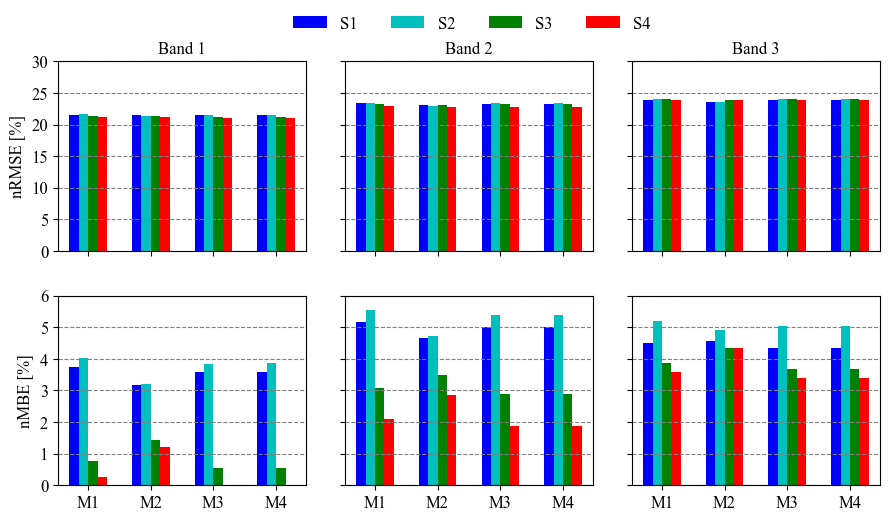

In [91]:
labels = ['M1','M2','M3','M4']

width = 0.15
x = np.arange(len(labels)) 
fig, ax = plt.subplots(2,3,figsize=(9,5),dpi=100)
s1 = df1r.loc['S1']
s2 = df1r.loc['S2']
s3 = df1r.loc['S3']
s4 = df1r.loc['S4']
rects0 = ax[0,0].bar(x - 1.5*width, s1,width, label='S1',color = 'b')
rects1 = ax[0,0].bar(x - width/2, s2, width, label='S2', color = 'c')
rects2 = ax[0,0].bar(x + width/2, s3, width, label='S3', color = 'g')
rects3 = ax[0,0].bar(x + 1.5*width, s4, width, label='S4', color = 'r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0,0].set_ylabel('nRMSE [%]',fontsize=12)
ax[0,0].set_title('Band 1',fontsize=12)
ax[0,0].set_xticks(x)
ax[0,0].set_xticklabels(labels,color='w')
ax[0,0].set_ylim(0,30)
ax[0,0].set_yticklabels([0,5,10,15,20,25,30],fontsize=12)
ax[0,0].grid(axis='y',ls='--',color='grey')

s1 = df2r.loc['S1']
s2 = df2r.loc['S2']
s3 = df2r.loc['S3']
s4 = df2r.loc['S4']
rects0 = ax[0,1].bar(x - 1.5*width, s1,width, label='S1',color = 'b')
rects1 = ax[0,1].bar(x - width/2, s2, width, label='S2', color = 'c')
rects2 = ax[0,1].bar(x + width/2, s3, width, label='S3', color = 'g')
rects3 = ax[0,1].bar(x + 1.5*width, s4, width, label='S4', color = 'r')

ax[0,1].set_title('Band 2',fontsize=12)
ax[0,1].set_xticks(x)
ax[0,1].set_xticklabels(labels,color='w')
ax[0,1].set_ylim(0,30)
ax[0,1].set_yticklabels([0,5,10,15,20,25,30],color='w')
ax[0,1].grid(axis='y',ls='--',color='grey')

s1 = df3r.loc['S1']
s2 = df3r.loc['S2']
s3 = df3r.loc['S3']
s4 = df3r.loc['S4']
rects0 = ax[0,2].bar(x - 1.5*width, s1,width, label='S1',color = 'b')
rects1 = ax[0,2].bar(x - width/2, s2, width, label='S2', color = 'c')
rects2 = ax[0,2].bar(x + width/2, s3, width, label='S3', color = 'g')
rects3 = ax[0,2].bar(x + 1.5*width, s4, width, label='S4', color = 'r')

ax[0,2].set_title('Band 3',fontsize=12)
ax[0,2].set_xticks(x)
ax[0,2].set_xticklabels(labels,color='w')
ax[0,2].set_ylim(0,30)
ax[0,2].set_yticklabels([0,5,10,15,20,25,30],color='w')
ax[0,2].grid(axis='y',ls='--',color='grey')

s1 = df1m.loc['S1']
s2 = df1m.loc['S2']
s3 = df1m.loc['S3']
s4 = df1m.loc['S4']
rects0 = ax[1,0].bar(x - 1.5*width, s1,width, label='S1',color = 'b')
rects1 = ax[1,0].bar(x - width/2, s2, width, label='S2', color = 'c')
rects2 = ax[1,0].bar(x + width/2, s3, width, label='S3', color = 'g')
rects3 = ax[1,0].bar(x + 1.5*width, s4, width, label='S4', color = 'r')

ax[1,0].set_ylabel('nMBE [%]',fontsize=12)
ax[1,0].set_xticks(x)
ax[1,0].set_xticklabels(labels,fontsize=12)
ax[1,0].set_ylim(0,6)
ax[1,0].set_yticklabels([0,1,2,3,4,5,6],fontsize=12)
ax[1,0].grid(axis='y',ls='--',color='grey')

s1 = df2m.loc['S1']
s2 = df2m.loc['S2']
s3 = df2m.loc['S3']
s4 = df2m.loc['S4']
rects0 = ax[1,1].bar(x - 1.5*width, s1,width, label='S1',color = 'b')
rects1 = ax[1,1].bar(x - width/2, s2, width, label='S2', color = 'c')
rects2 = ax[1,1].bar(x + width/2, s3, width, label='S3', color = 'g')
rects3 = ax[1,1].bar(x + 1.5*width, s4, width, label='S4', color = 'r')

ax[1,1].set_xticks(x)
ax[1,1].set_xticklabels(labels,fontsize=12)
ax[1,1].set_ylim(0,6)
ax[1,1].set_yticklabels([0,1,2,3,4,5,6],color='w')
ax[1,1].grid(axis='y',ls='--',color='grey')

s1 = df3m.loc['S1']
s2 = df3m.loc['S2']
s3 = df3m.loc['S3']
s4 = df3m.loc['S4']
rects0 = ax[1,2].bar(x - 1.5*width, s1,width, label='S1',color = 'b')
rects1 = ax[1,2].bar(x - width/2, s2, width, label='S2', color = 'c')
rects2 = ax[1,2].bar(x + width/2, s3, width, label='S3', color = 'g')
rects3 = ax[1,2].bar(x + 1.5*width, s4, width, label='S4', color = 'r')

ax[1,2].set_xticks(x)
ax[1,2].set_xticklabels(labels,fontsize=12)
ax[1,2].set_ylim(0,6)
ax[1,2].set_yticklabels([0,1,2,3,4,5,6],color='w')
ax[1,2].grid(axis='y',ls='--',color='grey')

fig.tight_layout()
handles, labels = ax[0,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',ncol=4, bbox_to_anchor=(0.53, 1.05),frameon = False,fontsize=12)

#plt.savefig('fig_csi.pdf',bbox_inches='tight')
plt.show()

Similarly, by comparing ghi estimation and ghi measurements using the derived csi and REST2 clear-sky model, the results show S4 and M3/M4 have better results. 